In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/Users/usuario1/Desktop/P_ia/SP500-Prediction-Dimmy/data/sp500.csv')

In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [13]:
df = df.sort_values('DATE')

In [14]:
df.set_index('DATE', inplace=True)

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [16]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [17]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [18]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [20]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0558 - val_loss: 0.0311
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0063 - val_loss: 0.0136
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0054 - val_loss: 0.0140
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0042 - val_loss: 0.0061
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0034 - val_loss: 0.0071
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0035 - val_loss: 0.0084
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0037 - val_loss: 0.0123
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

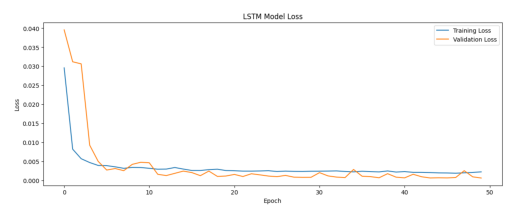

In [4]:

img = plt.imread(r'C:\Users\ednaldo\Desktop\SP500-Prediction-Dimmy\plots\lstm\plotlstm.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

14/14 [==============================] - 1s 18ms/step
2/2 [==============================] - 0s 20ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
mae = mean_absolute_error(y_test, test_predict)
mse = mean_squared_error(y_test, test_predict)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, test_predict)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 37.182267150878886
MSE: 2278.2397933728166
RMSE: 47.7309102508303
R²: 0.8287038286141011

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('LSTM Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.show()

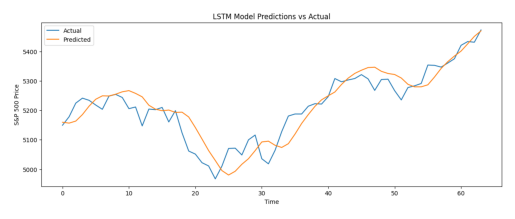

In [5]:

img = plt.imread(r'C:\Users\ednaldo\Desktop\SP500-Prediction-Dimmy\plots\lstm\plotlstm2.png')
plt.imshow(img)
plt.axis('off')  
plt.show()